# Implementation of LSTM on Nifty 50 Dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error,r2_score
import warnings
import seaborn as sns
import tensorflow as tf

In [2]:
warnings.filterwarnings("ignore")

In [3]:
# Load the data
nifty_50_df = pd.read_csv(r"D:\Jupyter Notebook\Stock Prediction\DataSets\Nifty 50 2000-2021\Nifty 50 2000-2021.csv")
# nifty_50_df = pd.read_csv(r"D:\Jupyter Notebook\Stock Prediction\DataSets\archive (3)\NIFTY 500.csv")

In [4]:
print(nifty_50_df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Turnover', 'P/E',
       'P/B', 'Div Yield', '20_EMA', '50_EMA', '200_EMA', 'ITC', 'HUL', 'SBI',
       'INFY', 'HDFC', 'Diff', 'Movements'],
      dtype='object')


In [5]:
# Convert the 'Date' column to datetime and set it as the index
nifty_50_df['Date'] = pd.to_datetime(nifty_50_df['Date'])
nifty_50_df.set_index('Date', inplace=True)

In [6]:
nifty_50_df.head()

Open     High      Low    Close    Volume      Turnover    P/E  \
Date                                                                            
2000-01-04  1594.40  1641.95  1594.40  1638.70  38787872  1.973690e+10  26.67   
2000-01-05  1634.55  1635.50  1555.05  1595.80  62153431  3.084790e+10  25.97   
2000-01-06  1595.80  1639.00  1595.80  1617.60  51272875  2.531180e+10  26.32   
2000-01-07  1616.60  1628.25  1597.20  1613.30  54315945  1.914630e+10  26.25   
2000-01-10  1615.65  1662.10  1614.95  1632.95  45013949  2.375350e+10  26.57   

             P/B  Div Yield       20_EMA       50_EMA      200_EMA     ITC  \
Date                                                                         
2000-01-04  4.76       0.92  1596.628571  1594.023529  1592.662687  712.35   
2000-01-05  4.64       0.95  1596.549660  1594.093195  1592.693904  726.20   
2000-01-06  4.70       0.94  1598.554454  1595.015030  1592.941725  784.30   
2000-01-07  4.69       0.94  1599.958792  1595.732088  1593.144295  847.05   
2000-01-10  4.74       0.93  1603.100812  1597.191614  1593.540372  914.85   

                HUL     SBI      INFY    HDFC   Diff  Movements  
Date                                                             
2000-01-04  2281.05  259.10  16855.90  173.80  46.50        0.0  
2000-01-05  2199.90  248.45  15507.45  166.95 -42.90        1.0  
2000-01-06  2288.20  261.00  14266.85  168.30  21.80        0.0  
2000-01-07  2412.95  273.30  13125.50  168.35  -4.30        1.0  
2000-01-10  2431.25  269.50  13757.30  165.90  19.65        0.0

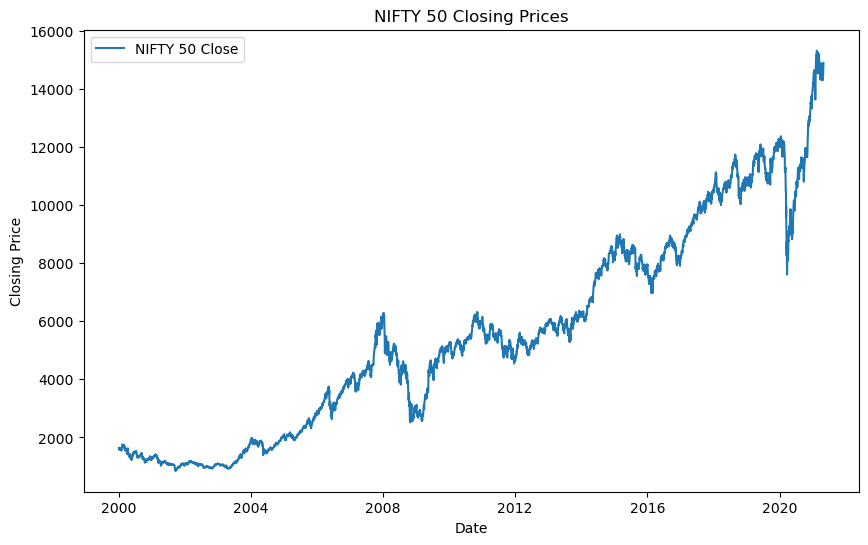

In [7]:
# Plot the closing prices
plt.figure(figsize=(10, 6))
plt.plot(nifty_50_df['Close'], label='NIFTY 50 Close')
plt.title('NIFTY 50 Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

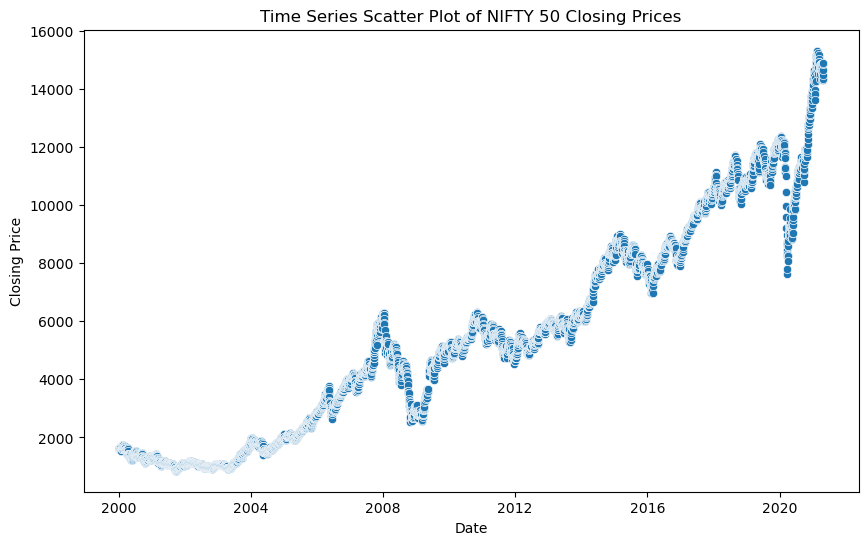

In [8]:
# Time Series Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=nifty_50_df.index, y=nifty_50_df['Close'])
plt.title('Time Series Scatter Plot of NIFTY 50 Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [9]:
# Prepare the data for modeling
data = nifty_50_df[['Close']].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [10]:
# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.7)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

In [11]:
# Create a function to create datasets for training and testing
def create_dataset(dataset, time_step):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

In [12]:
# Create the training and testing datasets
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [13]:
# Reshape the data for GRU layers
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [14]:
# Create the GRU model
model = Sequential()
model.add(LSTM(200, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.4))
model.add(LSTM(160, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

In [15]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.MeanAbsolutePercentageError()])

In [16]:
# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 19s 147ms/step - loss: 0.0059 - mean_absolute_percentage_error: 849.4501 - val_loss: 3.7930e-04 - val_mean_absolute_percentage_error: 2.1124
Epoch 2/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 16s 143ms/step - loss: 1.1865e-04 - mean_absolute_percentage_error: 2403.0684 - val_loss: 3.1210e-04 - val_mean_absolute_percentage_error: 1.8683
Epoch 3/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 15s 136ms/step - loss: 1.2789e-04 - mean_absolute_percentage_error: 2120.3105 - val_loss: 2.9021e-04 - val_mean_absolute_percentage_error: 1.7979
Epoch 4/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 16s 143ms/step - loss: 9.8923e-05 - mean_absolute_percentage_error: 1314.7556 - val_loss: 3.6119e-04 - val_mean_absolute_percentage_error: 2.1583
Epoch 5/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 16s 140ms/step - loss: 1.1067e-04 - mean_absolute_percentage_error: 4727.4741 - val_loss: 4.2108e-04 - val_mean_absolute_percentage_error: 2.3424
Epoch 6/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 16s 142ms/step - loss: 1.1459e-04 -

113/113 ━━━━━━━━━━━━━━━━━━━━ 16s 137ms/step - loss: 5.8205e-05 - mean_absolute_percentage_error: 2478.7366 - val_loss: 1.1587e-04 - val_mean_absolute_percentage_error: 1.1774
Epoch 39/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 15s 135ms/step - loss: 5.2589e-05 - mean_absolute_percentage_error: 1047.9933 - val_loss: 5.5969e-04 - val_mean_absolute_percentage_error: 3.3743
Epoch 40/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 16s 139ms/step - loss: 7.6706e-05 - mean_absolute_percentage_error: 42.6584 - val_loss: 1.2654e-04 - val_mean_absolute_percentage_error: 1.2586
Epoch 41/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 18s 158ms/step - loss: 5.9410e-05 - mean_absolute_percentage_error: 182.9418 - val_loss: 1.0588e-04 - val_mean_absolute_percentage_error: 1.1184
Epoch 42/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 19s 169ms/step - loss: 5.3847e-05 - mean_absolute_percentage_error: 1342.5559 - val_loss: 2.0615e-04 - val_mean_absolute_percentage_error: 1.7597
Epoch 43/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 20s 176ms/step - loss: 6.8254e-05 - mea

In [17]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step


In [18]:
# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [19]:
# Inverse transform the original values
original_y_train = scaler.inverse_transform([y_train])
original_y_test = scaler.inverse_transform([y_test])

In [20]:
# Create plots for the predicted values
train_predict_plot = np.empty_like(scaled_data)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_step:len(train_predict) + time_step, :] = train_predict

In [21]:
test_predict_plot = np.empty_like(scaled_data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (time_step * 2) + 1:len(scaled_data) - 1, :] = test_predict

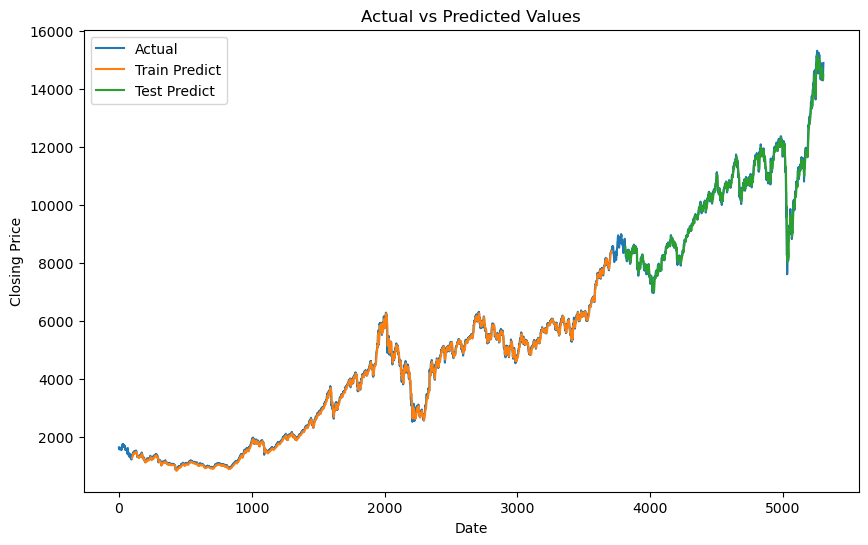

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(scaled_data), label='Actual')
plt.plot(train_predict_plot, label='Train Predict')
plt.plot(test_predict_plot, label='Test Predict')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

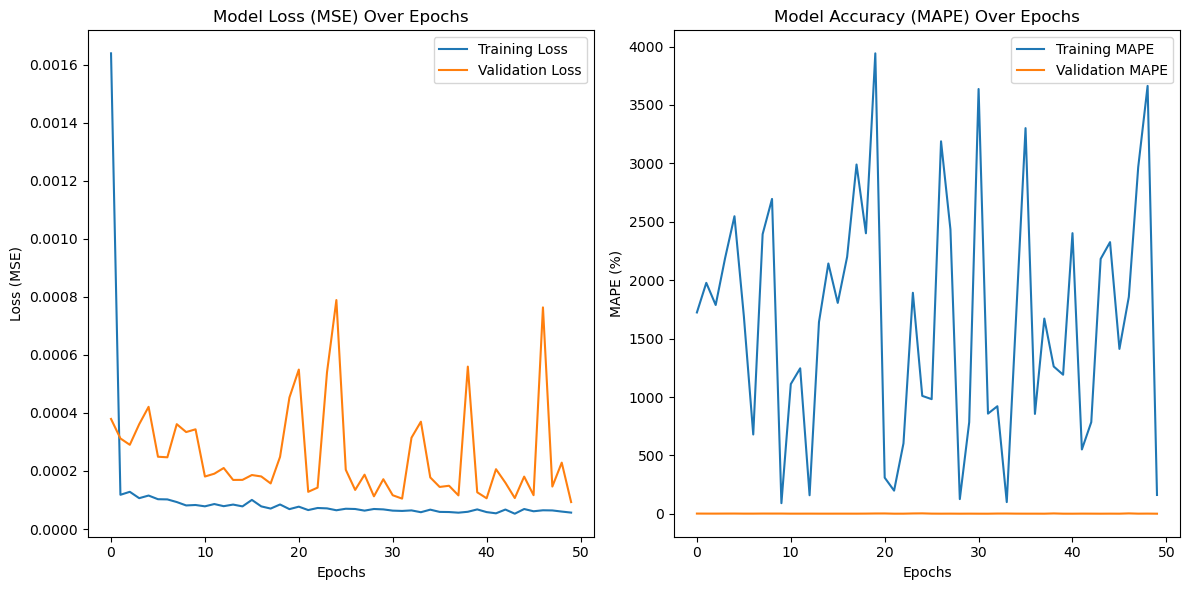

In [23]:
# Plot the model loss and MAPE over epochs
plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (MSE) Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

# Plot MAPE
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_percentage_error'], label='Training MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='Validation MAPE')
plt.title('Model Accuracy (MAPE) Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAPE (%)')
plt.legend()

plt.tight_layout()
plt.show()

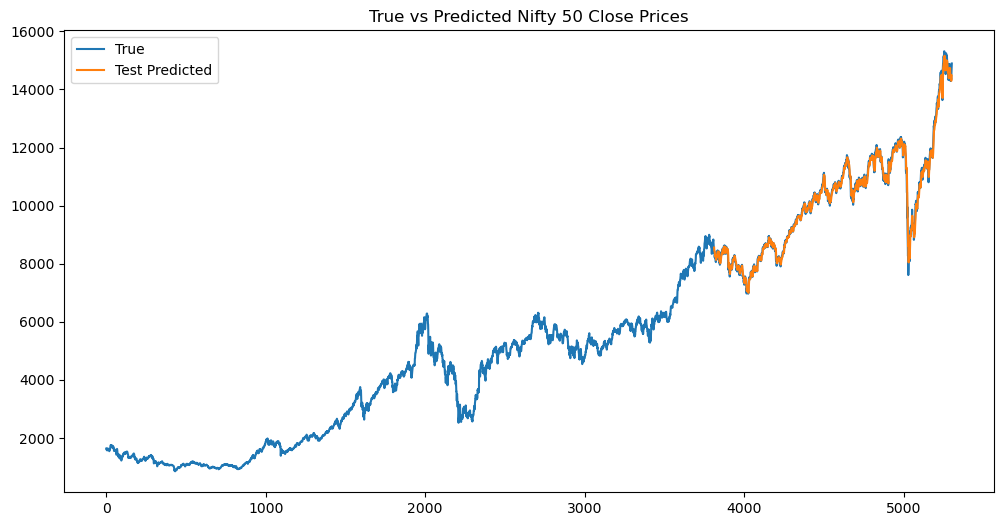

In [24]:
# Plot true vs predicted residuals
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(scaled_data), label="True")
plt.plot(test_predict_plot, label="Test Predicted")
plt.title("True vs Predicted Nifty 50 Close Prices")
plt.legend()
plt.show()

In [25]:
# Calculate R² score for training and testing sets
train_r2 = r2_score(original_y_train[0], train_predict[:, 0])
test_r2 = r2_score(original_y_test[0], test_predict[:, 0])

train_rmse = np.sqrt(mean_squared_error(original_y_train[0], train_predict[:, 0]))
test_rmse = np.sqrt(mean_squared_error(original_y_test[0], test_predict[:, 0]))

train_mae = mean_absolute_error(original_y_train[0], train_predict[:, 0])
test_mae = mean_absolute_error(original_y_test[0], test_predict[:, 0])

train_mse = mean_squared_error(original_y_train[0], train_predict[:, 0])
test_mse = mean_squared_error(original_y_test[0], test_predict[:, 0])

train_mate = median_absolute_error(original_y_train[0], train_predict[:, 0])
test_mate = median_absolute_error(original_y_test[0], test_predict[:, 0])

train_smate = np.sqrt(mean_squared_error(original_y_train[0], train_predict[:, 0])) / np.mean(original_y_train)
test_smate = np.sqrt(mean_squared_error(original_y_test[0], test_predict[:, 0])) / np.mean(original_y_test)

print(f'Train R²: {train_r2}')
print(f'Test R²: {test_r2}')

print("Training RMSE: ", train_rmse)
print("Testing RMSE: ", test_rmse)

print("Training MAE: ", train_mae)
print("Testing MAE: ", test_mae)

print("Training MSE: ", train_mse)
print("Testing MSE: ", test_mse)

print("Training MATE: ", train_mate)
print("Testing MATE: ", test_mate)

print("Training SMATE: ", train_smate)
print("Testing SMATE: ", test_smate)

Train R²: 0.9984963403459267
Test R²: 0.9941397400263097
Training RMSE:  77.63812568845046
Testing RMSE:  139.30832343600397
Training MAE:  58.785259690307164
Testing MAE:  97.51683113000922
Training MSE:  6027.678560415631
Testing MSE:  19406.808978550296
Training MATE:  46.80463867187473
Testing MATE:  73.23281250000036
Training SMATE:  0.02125101862287593
Testing SMATE:  0.013662021352783523


In [26]:
from tabulate import tabulate
import numpy as np
# Create a table
table = [
    ["Metric", "Training", "Testing"],
    ["R² Score", f"{train_r2:.4f}", f"{test_r2:.4f}"],
    ["RMSE", f"{train_rmse:.4f}", f"{test_rmse:.4f}"],
    ["MSE", f"{train_mse:.4f}", f"{test_mse:.4f}"],
    ["MAE", f"{train_mae:.4f}", f"{test_mae:.4f}"],
    ["MATE", f"{train_mate:.4f}", f"{test_mate:.4f}"],
    ["SMATE", f"{train_smate:.4f}", f"{test_smate:.4f}"]
]

print(tabulate(table, headers="firstrow", tablefmt="grid"))

+----------+------------+------------+
| Metric   |   Training |    Testing |
+==========+============+============+
| R² Score |     0.9985 |     0.9941 |
+----------+------------+------------+
| RMSE     |    77.6381 |   139.308  |
+----------+------------+------------+
| MSE      |  6027.68   | 19406.8    |
+----------+------------+------------+
| MAE      |    58.7853 |    97.5168 |
+----------+------------+------------+
| MATE     |    46.8046 |    73.2328 |
+----------+------------+------------+
| SMATE    |     0.0213 |     0.0137 |
+----------+------------+------------+
